In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras import regularizers
import numpy as np
import tensorflow as tf

In [ ]:
# (X_train, y_train), (X_test, y_test) = mnist.load_data()
# npzfile = np.load("/content/neg_with_noise.npz")
# #print(type(mnist.load_data()))
# npfile=sorted(npzfile.files)
# X_N_train=npzfile['arr_0']
# y_N_train=npzfile['arr_1']
# X_N_test=npzfile['arr_2']
# y_N_test=npzfile['arr_3']
# #print(X_N_train)

In [ ]:
# print(X_N_train.shape,len(X_N_train))

(10000, 28, 28) 10000


In [ ]:
# print(y_N_train.shape, len(y_N_train))

(10000,) 10000


In [ ]:
# print(X_N_test.shape, len(X_N_test))

(1000, 28, 28) 1000


In [ ]:
# print(y_N_test.shape , len(y_N_test))

(1000,) 1000


In [ ]:
# X_train=np.append(X_train, X_N_train,0)
# y_train=np.append(y_train, y_N_train,0)
# X_test=np.append(X_test, X_N_test,0)
# y_test=np.append(y_test, y_N_test,0)
npzfile = np.load("/content/minst_with_P&N&noise.npz")
print(type(mnist.load_data()))
npfile=sorted(npzfile.files)
X_train=npzfile['arr_0']
y_train=npzfile['arr_1']
X_test=npzfile['arr_2']
y_test=npzfile['arr_3']

<class 'tuple'>


In [ ]:
from sklearn.utils import shuffle
for i in range(130):
  X_train, y_train = shuffle(X_train, y_train)
  X_test, y_test = shuffle(X_test, y_test)

In [ ]:
y_test.shape

(11000,)

In [ ]:
len(X_train)

70000

In [ ]:
len(X_test)

11000

In [ ]:
# from google.colab import drive
#drive.mount('/content/drive')
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)
# np.savez("/content/minst_with_P&N", X_train,y_train,X_test,y_test)

(70000, 28, 28) (70000,) (11000, 28, 28) (11000,)


(28, 28)
Digit class: 4


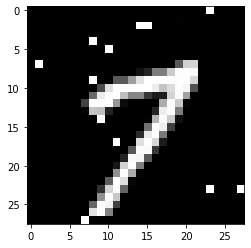

In [ ]:
plt.imshow(X_train[1], 'gray')
print(X_train[1].shape)
print("Digit class:", y_train[0])

In [ ]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
#X_train

In [ ]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train, 11) # 10 classes to codify
Y_test = np_utils.to_categorical(y_test, 11)
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, AveragePooling2D
from keras.layers.core import Flatten

train_T= X_train.reshape(70000, 28, 28, 1)
val_data=len(train_T)*35/100
X_valtensor = train_T[:int(val_data)]
Y_valtensor = Y_train[:int(val_data)]
X_traintensor = train_T[int(val_data):]
Y_traintensor = Y_train[int(val_data):]
testtensor = X_test.reshape(11000, 28, 28, 1)
print(train_T.shape)
print(len(train_T)*35/100)
print(X_traintensor.shape)
print(len(X_valtensor)+len(X_traintensor))

(70000, 28, 28, 1)
24500.0
(45500, 28, 28, 1)
70000


In [ ]:
img_rows = 28
img_cols = 28
kernel_size = 3
pool_size = 2
model = Sequential()

model.add(Convolution2D(16, kernel_size=(3, 3),input_shape=(img_rows, img_cols, 1)))
model.add(Activation('relu'))

model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu')),

model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu')),

model.add(Flatten())

model.add(Dense(128)),
model.add(Activation('relu'))
model.add(Dropout(0.5))
#model.add(Dense(80, activation = 'relu'))
model.add(Dense(11, activation = 'softmax'))
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 activation_42 (Activation)  (None, 26, 26, 16)        0         
                                                                 
 conv2d_32 (Conv2D)          (None, 24, 24, 32)        4640      
                                                                 
 activation_43 (Activation)  (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 12, 12, 32)        0         
                                                     

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=["accuracy"])

model_history = model.fit(
    X_traintensor,
    Y_traintensor,
    batch_size=128,
    epochs=9,
    verbose=1,
    validation_data=(X_valtensor, Y_valtensor)
)#24

Epoch 1/9
356/356 [==============================] - 59s 166ms/step - loss: 0.0270 - accuracy: 0.9915 - val_loss: 0.0332 - val_accuracy: 0.9903
Epoch 2/9
356/356 [==============================] - 59s 166ms/step - loss: 0.0220 - accuracy: 0.9933 - val_loss: 0.0316 - val_accuracy: 0.9912
Epoch 3/9
356/356 [==============================] - 59s 166ms/step - loss: 0.0195 - accuracy: 0.9934 - val_loss: 0.0365 - val_accuracy: 0.9911
Epoch 4/9
356/356 [==============================] - 59s 166ms/step - loss: 0.0182 - accuracy: 0.9941 - val_loss: 0.0319 - val_accuracy: 0.9921
Epoch 5/9
356/356 [==============================] - 59s 166ms/step - loss: 0.0182 - accuracy: 0.9940 - val_loss: 0.0325 - val_accuracy: 0.9922
Epoch 6/9
356/356 [==============================] - 59s 166ms/step - loss: 0.0155 - accuracy: 0.9949 - val_loss: 0.0402 - val_accuracy: 0.9917
Epoch 7/9
356/356 [==============================] - 59s 166ms/step - loss: 0.0148 - accuracy: 0.9951 - val_loss: 0.0323 - val_accuracy:

344/344 [==============================] - 4s 11ms/step - loss: 0.0312 - accuracy: 0.9923
Test loss 0.031244434416294098
Test accuracy 0.9922727346420288


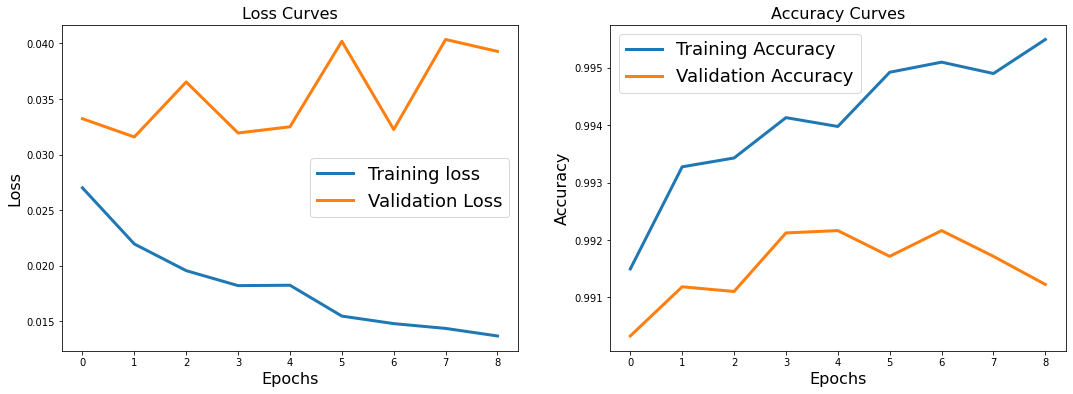

In [ ]:
preds = model.predict(testtensor)

score = model.evaluate(testtensor, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

plt.figure(figsize=(18,6))

# Loss Curves
plt.subplot(1,2,1)
plt.plot(model_history.history['loss'], linewidth=3.0)
plt.plot(model_history.history['val_loss'], linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'], fontsize=18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)

# Accuracy Curves
plt.subplot(1,2,2)
plt.plot(model_history.history["accuracy"], linewidth=3.0)
plt.plot(model_history.history['val_accuracy'], linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

In [ ]:
from keras.models import load_model

model.save('MNIST_model_L6N.h5')

(11000,)


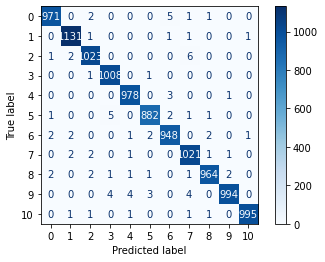

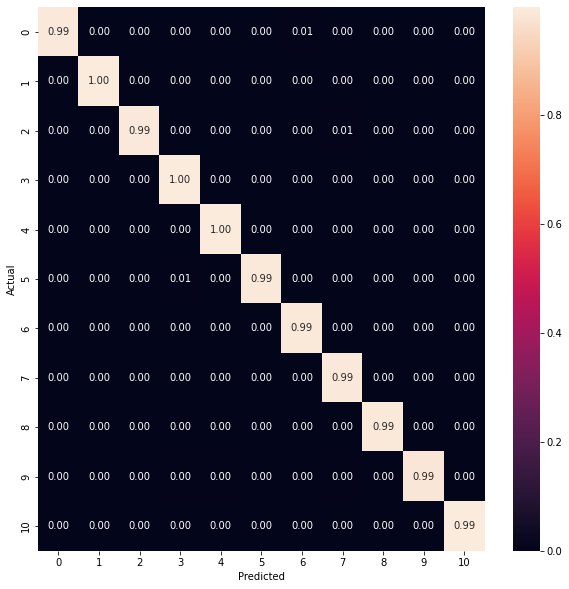

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

y_pred = model.predict(testtensor)
print(y_test.shape)
y_pred_plot=np.argmax(y_pred, axis=1)
y_test_plot=np.argmax(Y_test, axis=1)

cm = confusion_matrix(y_test_plot, y_pred_plot)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

import seaborn as sns
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)